## Import packages 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## Read data

In [2]:
reviews = pd.read_csv('airbnb_review.csv')
prices = pd.read_csv('airbnb_price.csv')
room_types = pd.read_excel('airbnb_room_type.xlsx')


display(reviews.head())
display(prices.head())
display(room_types.head())

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [3]:
# If there is any null value in the column that will not be used, I just ignore it. 
print(reviews.isnull().sum(), '\n')
print(prices.isnull().sum(), '\n')
print(room_types.isnull().sum(), '\n')

listing_id     0
host_name      8
last_review    0
dtype: int64 

listing_id     0
price          0
nbhood_full    0
dtype: int64 

listing_id      0
description    10
room_type       0
dtype: int64 



## Clean the price column¶

In [4]:
# Remove whitespace and 'dollars' from prices column
prices['price'] = prices['price'].str.replace(' dollars', '')

# Convert prices column to numeric datatype
prices['price'] = pd.to_numeric(prices['price'])

print(prices['price'],'\n')
print(prices['price'].describe())

# Subset prices that are not $0
prices = prices.loc[~(prices['price']==0)]

0        225
1         89
2        200
3         79
4        150
        ... 
25204    129
25205     45
25206    235
25207    100
25208     30
Name: price, Length: 25209, dtype: int64 

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


## Calculate average price per night

In [5]:
# Calculate the average price
avg_price = round(prices['price'].mean(), 2)

print(f'The average price per night for an Airbnb listing in NYC is ${avg_price}.')

The average price per night for an Airbnb listing in NYC is $141.82.


## Compare the montly costs of Airbnb to the private rental market¶

In [6]:
# Convert the per night prices of Airbnb listings into monthly costs
prices['price_per_month'] = prices['price'] * 365 / 12

# Calculate average price per month
average_price_per_month = round(prices['price_per_month'].mean(), 2)

# Compare Airbnb and rental market
print(f'Airbnb monthly costs are ${average_price_per_month}. while in the private market you would pay {"$3,100.00"}')
print(f'Airbnb is ${round(average_price_per_month-3100, 2)} higher.')

Airbnb monthly costs are $4313.61. while in the private market you would pay $3,100.00
Airbnb is $1213.61 higher.


## Clean the room type column¶

In [7]:
# Convert the room_type column to lowercase
room_types['room_type'] = room_types['room_type'].str.lower()

# Change the room_type column to category data type
room_types['room_type'] = room_types['room_type'].astype('category')

In [8]:
print(room_types['room_type'].unique())

['entire home/apt', 'private room', 'shared room']
Categories (3, object): ['entire home/apt', 'private room', 'shared room']


## Count the room type

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64 



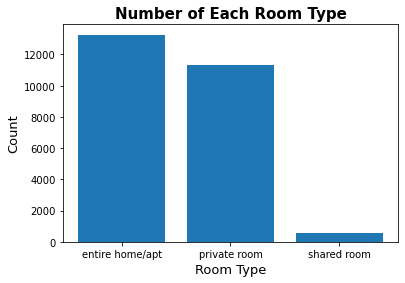

In [9]:
# Plot the count of each room type 
room_frequencies = room_types['room_type'].value_counts()

print(room_frequencies, '\n')


plt.figure(figsize=(6,4))

plt.bar(room_types['room_type'].unique(),room_frequencies)
plt.title('Number of Each Room Type', fontsize=15, fontweight='bold')
plt.xlabel('Room Type', fontsize=13)
plt.ylabel('Count', fontsize=13)

plt.show()

## What is the earliest and latest review dates?

In [10]:
# Change the last_review column to datetime data type
reviews['last_review'] = pd.to_datetime(reviews['last_review'])

# Extract the earliest review date
first_reviewed = reviews['last_review'].dt.date.min()

# Extract the most recent review date
last_reviewed = reviews['last_review'].dt.date.max()

print(f'The collection of the Airbnb review spans from {first_reviewed} to {last_reviewed}.')

The collection of the Airbnb review spans from 2019-01-01 to 2019-07-09.


## Merge the DataFrames

In [11]:
# Merge prices and room_types DataFrame
rooms_and_prices = prices.merge(room_types, how='outer', on='listing_id')

# Merge rooms_and_prices with reviews DataFrame 
airbnb_merged = rooms_and_prices.merge(reviews, how='outer', on='listing_id')

airbnb_merged.dropna(inplace=True)

## Analyze listing prices by NYC borough

In [12]:
# Extract borough name from nbhood_full column 
airbnb_merged['borough'] = airbnb_merged['nbhood_full'].str.partition(',')[0]

# Group by borough and calculate summary statistics
boroughs = airbnb_merged.groupby('borough')['price'].agg(['mean', 'median', 'sum', 'count'])

boroughs = boroughs.round(2).sort_values('median', ascending=False)

print(boroughs)

                 mean  median        sum  count
borough                                        
Manhattan      184.04   149.0  1898417.0  10315
Brooklyn       122.02    95.0  1275250.0  10451
Staten Island   86.04    71.0    22974.0    267
Queens          92.83    70.0   320715.0   3455
Bronx           79.25    65.0    55156.0    696


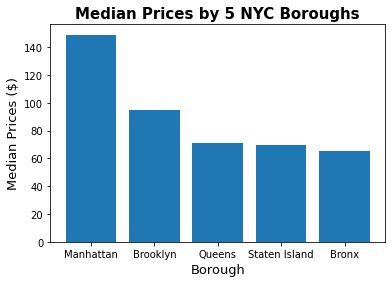

In [13]:
# Plot the median prices by 5 NYC boroughs 
plt.figure(figsize=(6,4))

plt.bar(airbnb_merged['borough'].unique(), boroughs['median'])
plt.title('Median Prices by 5 NYC Boroughs', fontsize=15, fontweight='bold')
plt.xlabel('Borough', fontsize=13)
plt.ylabel('Median Prices ($)', fontsize=13)

plt.show()

## Analyze listing prices by room type

In [14]:
# Group by room type and calculate summary statistics
types = airbnb_merged.groupby('room_type')['price'].agg(['mean', 'median', 'sum', 'count'])

types = types.round(2).sort_values('median', ascending=False)

print(types)

                   mean  median        sum  count
room_type                                        
entire home/apt  197.19   159.0  2615133.0  13262
private room      81.68    70.0   925995.0  11337
shared room       53.65    41.0    31384.0    585


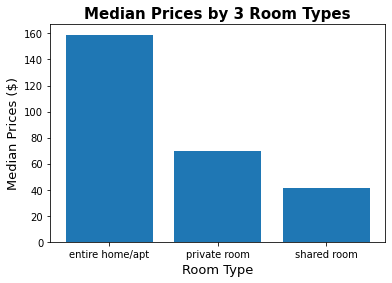

In [15]:
# Plot the median prices by 3 room types
plt.figure(figsize=(6,4))

plt.bar(airbnb_merged['room_type'].unique(), types['median'])
plt.title('Median Prices by 3 Room Types', fontsize=15, fontweight='bold')
plt.xlabel('Room Type', fontsize=13)
plt.ylabel('Median Prices ($)', fontsize=13)

plt.show()

## Categorize price range by borough

In [16]:
# Price ragne:
# - Budget  $0-69
# - Average  $70-175
# - Expensive  $176-350
# - Extravagant  >$350


# Create labels for the price range
labels = ['Budget','Average','Expensive','Extravagant']

# Create the label ranges
ranges = [0, 69, 175, 350, np.inf]

airbnb_merged['price_range'] = pd.cut(airbnb_merged['price'], bins=ranges, labels=labels)

# Calculate borough and price_range frequencies
prices_by_borough = airbnb_merged.groupby(['borough','price_range'])['price_range'].count()
print(prices_by_borough) 

borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive        20
               Extravagant       0
Name: price_range, dtype: int64
